# Tasks
1. From V_in, R, and C generate V_out
1. From V_out generate I_out
1. From V_out and I_out generate Z
1. Match Z with R and C

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Device and Circuit Settings

In [187]:
# Duration of sin wave in seconds
duration = 1

# Frequency & Amplitude of sin wave
freq = 5
amp = 3.3 / 2

# Sampling rate of device
samp_rate = freq * 100

# Input voltage wave
samp_num = int(duration * samp_rate)
t = np.linspace(0, duration, num=samp_num)
V_in = amp * np.sin(freq*(2*np.pi*t))

# Resistance in Ohms
R = 10

# Capacitance in Farads
C = 1e-6

# Ground value of circuit
V_g = 1.65

# Variable resistor of device
R_f = 0

# Impedance of RC series
Z = abs(complex(R, -1/(freq*C)))

# Output current wave
I_out = (- V_in) / Z

# Output voltage wave
V_out = V_in - I_out * R_f

In [188]:
print("Device parameters:")
print(f"{R_f=}")
print(f"{V_g=}")
print(f"{freq=}")
print(f"{duration=}")

print("\nCircuit parameters:")
print(f"{R=}")
print(f"{C=}")
print(f"{Z=}")

Device parameters:
R_f=0
V_g=1.65
freq=5
duration=1

Circuit parameters:
R=10
C=1e-06
Z=200000.00025000004


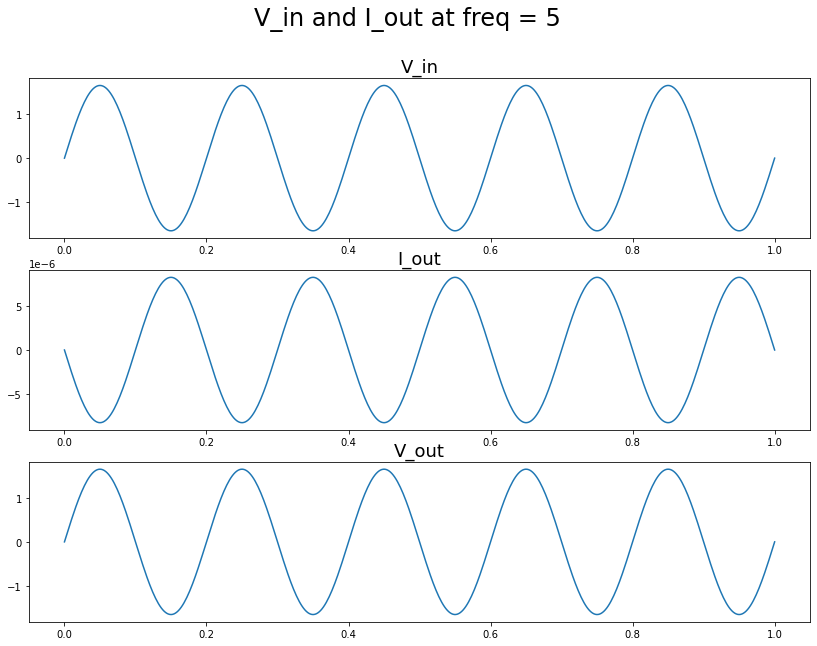

In [189]:
fig, ax = plt.subplots(3, 1, figsize=(14, 10))

fig.suptitle(f"V_in and I_out at freq = {freq}", size=24)
ax[0].set_title(f"V_in", size=18)
ax[0].plot(t, V_in)

ax[1].set_title(f"I_out", size=18)
ax[1].plot(t, I_out)

ax[2].set_title(f"V_out", size=18)
ax[2].plot(t, V_out)

<StemContainer object of 3 artists>

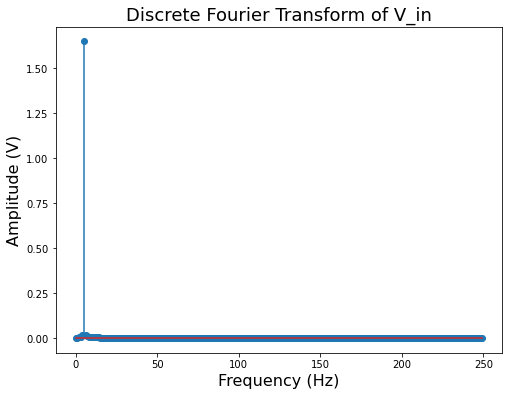

In [197]:
V_in_fft = 2 * np.abs(np.fft.fft(V_in)) / len(V_in)
V_in_fft = V_in_fft[:len(V_in_fft)//2]
V_in_amp = np.max(V_in_fft)

plt.figure(figsize=(8,6))
plt.title("Discrete Fourier Transform of V_in", size=18)
plt.xlabel("Frequency (Hz)", size=16)
plt.ylabel("Amplitude (V)", size=16)
plt.stem(V_in_fft)

<StemContainer object of 3 artists>

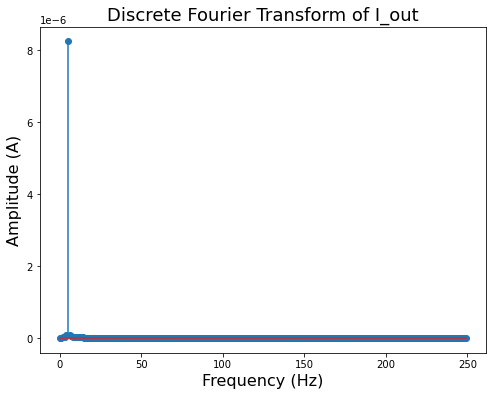

In [198]:
I_out_fft = 2 * np.abs(np.fft.fft(I_out)) / len(I_out)
I_out_fft = I_out_fft[:len(I_out_fft)//2]
I_out_amp = np.max(I_out_fft)

plt.figure(figsize=(8,6))
plt.title("Discrete Fourier Transform of I_out", size=18)
plt.xlabel("Frequency (Hz)", size=16)
plt.ylabel("Amplitude (A)", size=16)
plt.stem(I_out_fft)

In [199]:
V_in_amp / I_out_amp

200000.00025